# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=0.95)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-sgd-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-RMSprop-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-Adam-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-Adagrad-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 6s 121us/step - loss: 1.4293 - accuracy: 0.4984 - val_loss: 1.6560 - val_accuracy: 0.4248
Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4235 - accuracy: 0.5005 - val_loss: 1.6153 - val_accuracy: 0.4490
Epoch 50/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4271 - accuracy: 0.5005 - val_loss: 1.6458 - val_accuracy: 0.4346
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.4222 - accuracy: 0.8494 - val_loss: 2.0840 - val_accuracy: 0.5289
Epoch 47/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.4080 - accuracy: 0.8540 - val_loss: 2.1503 - val_accuracy: 0.5222
Epoch 48/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.4030 - accuracy: 0.8543 - val_loss: 2.1255 - val_accuracy: 0.5307
Epoch 49/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.3856 - accuracy: 0.8602 - val_loss: 2.1875 - val_accuracy: 0.5192
Epoch 50/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.3797 - accuracy: 0.8628 - val_loss: 2.3788 - val_accuracy: 0.5107
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 44/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9438 - accuracy: 0.6694 - val_loss: 1.3616 - val_accuracy: 0.5332
Epoch 45/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9310 - accuracy: 0.6731 - val_loss: 1.3618 - val_accuracy: 0.5370
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9241 - accuracy: 0.6749 - val_loss: 1.3798 - val_accuracy: 0.5345
Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9099 - accuracy: 0.6795 - val_loss: 1.3636 - val_accuracy: 0.5377
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.8982 - accuracy: 0.6852 - val_loss: 1.4345 - val_accuracy: 0.5150
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.8909 - accuracy: 0.6867 - val_loss: 1.5576 - val_accuracy: 0.4876
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.8760 - accuracy: 0.6927

Epoch 42/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5952 - accuracy: 0.4423 - val_loss: 1.6038 - val_accuracy: 0.4350
Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5908 - accuracy: 0.4424 - val_loss: 1.5975 - val_accuracy: 0.4417
Epoch 44/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5856 - accuracy: 0.4457 - val_loss: 1.5932 - val_accuracy: 0.4416
Epoch 45/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5813 - accuracy: 0.4464 - val_loss: 1.5909 - val_accuracy: 0.4474
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5763 - accuracy: 0.4480 - val_loss: 1.5859 - val_accuracy: 0.4493
Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5720 - accuracy: 0.4501 - val_loss: 1.5810 - val_accuracy: 0.4500
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5674 - accuracy: 0.4510

Epoch 40/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9457 - accuracy: 0.3176 - val_loss: 1.9454 - val_accuracy: 0.3150
Epoch 41/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.9422 - accuracy: 0.3187 - val_loss: 1.9421 - val_accuracy: 0.3166
Epoch 42/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9389 - accuracy: 0.3213 - val_loss: 1.9388 - val_accuracy: 0.3173
Epoch 43/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9355 - accuracy: 0.3217 - val_loss: 1.9356 - val_accuracy: 0.3189
Epoch 44/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9323 - accuracy: 0.3226 - val_loss: 1.9327 - val_accuracy: 0.3207
Epoch 45/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9293 - accuracy: 0.3246 - val_loss: 1.9295 - val_accuracy: 0.3223
Epoch 46/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9263 - accuracy: 0.3261

50000/50000 [==============================] - 6s 128us/step - loss: 2.3084 - accuracy: 0.0978 - val_loss: 2.3084 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.3079 - accuracy: 0.0989 - val_loss: 2.3218 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.3078 - accuracy: 0.1017 - val_loss: 2.3092 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3077 - accuracy: 0.1003 - val_loss: 2.3110 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3078 - accuracy: 0.1010 - val_loss: 2.3127 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3077 - accuracy: 0.0984 - val_loss: 2.3106 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.3077 - accuracy: 0.1009 - val_loss:

50000/50000 [==============================] - 7s 131us/step - loss: 1.7713 - accuracy: 0.3568 - val_loss: 1.8419 - val_accuracy: 0.3305
Epoch 35/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7707 - accuracy: 0.3564 - val_loss: 1.7672 - val_accuracy: 0.3524
Epoch 36/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.7660 - accuracy: 0.3600 - val_loss: 1.7979 - val_accuracy: 0.3379
Epoch 37/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7637 - accuracy: 0.3601 - val_loss: 2.0114 - val_accuracy: 0.2863
Epoch 38/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7609 - accuracy: 0.3623 - val_loss: 1.9529 - val_accuracy: 0.2985
Epoch 39/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7586 - accuracy: 0.3623 - val_loss: 1.8084 - val_accuracy: 0.3320
Epoch 40/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7635 - accuracy: 0.3619 - val_loss:

Epoch 32/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.0250 - accuracy: 0.6330 - val_loss: 1.6436 - val_accuracy: 0.4688
Epoch 33/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.0165 - accuracy: 0.6356 - val_loss: 1.7531 - val_accuracy: 0.4631
Epoch 34/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.9954 - accuracy: 0.6449 - val_loss: 1.7028 - val_accuracy: 0.4573
Epoch 35/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.9814 - accuracy: 0.6469 - val_loss: 1.7030 - val_accuracy: 0.4826
Epoch 36/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.9651 - accuracy: 0.6529 - val_loss: 1.6398 - val_accuracy: 0.4934
Epoch 37/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.9569 - accuracy: 0.6571 - val_loss: 1.6951 - val_accuracy: 0.4792
Epoch 38/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.9308 - accuracy: 0.6662

Epoch 30/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1545 - accuracy: 0.5971 - val_loss: 1.4922 - val_accuracy: 0.4857
Epoch 31/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1407 - accuracy: 0.6022 - val_loss: 1.4371 - val_accuracy: 0.4947
Epoch 32/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1276 - accuracy: 0.6071 - val_loss: 1.3810 - val_accuracy: 0.5150
Epoch 33/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1201 - accuracy: 0.6093 - val_loss: 1.3380 - val_accuracy: 0.5269
Epoch 34/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1090 - accuracy: 0.6130 - val_loss: 1.3726 - val_accuracy: 0.5169
Epoch 35/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.0937 - accuracy: 0.6184 - val_loss: 1.3804 - val_accuracy: 0.5145
Epoch 36/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.0847 - accuracy: 0.6219

Epoch 28/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.5151 - accuracy: 0.4752 - val_loss: 1.5446 - val_accuracy: 0.4585
Epoch 29/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5083 - accuracy: 0.4784 - val_loss: 1.5391 - val_accuracy: 0.4634: 1s
Epoch 30/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.5019 - accuracy: 0.4819 - val_loss: 1.5317 - val_accuracy: 0.4632
Epoch 31/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4948 - accuracy: 0.4833 - val_loss: 1.5480 - val_accuracy: 0.4529
Epoch 32/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4893 - accuracy: 0.4840 - val_loss: 1.5337 - val_accuracy: 0.4552
Epoch 33/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.4836 - accuracy: 0.4872 - val_loss: 1.5342 - val_accuracy: 0.4532 1.4882 - accuracy: 0.48 - ETA: 2s - loss: 1
Epoch 34/50
50000/50000 [==============================] -

50000/50000 [==============================] - 7s 149us/step - loss: 2.3071 - accuracy: 0.1014 - val_loss: 2.3060 - val_accuracy: 0.1000
Epoch 26/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.3060 - accuracy: 0.1006 - val_loss: 2.3088 - val_accuracy: 0.1000
Epoch 27/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.3065 - accuracy: 0.1022 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 28/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.3071 - accuracy: 0.1018 - val_loss: 2.3116 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.3068 - accuracy: 0.0984 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 30/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.3070 - accuracy: 0.0985 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.3071 - accuracy: 0.0988 - val_loss:

Epoch 23/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5635 - accuracy: 0.4398 - val_loss: 1.6031 - val_accuracy: 0.4238
Epoch 24/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5761 - accuracy: 0.4343 - val_loss: 1.6502 - val_accuracy: 0.4104
Epoch 25/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5833 - accuracy: 0.4315 - val_loss: 1.6126 - val_accuracy: 0.4148
Epoch 26/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5622 - accuracy: 0.4395 - val_loss: 1.6495 - val_accuracy: 0.4091
Epoch 27/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5748 - accuracy: 0.4346 - val_loss: 1.5872 - val_accuracy: 0.4358
Epoch 28/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5586 - accuracy: 0.4406 - val_loss: 1.6472 - val_accuracy: 0.4100
Epoch 29/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5755 - accuracy: 0.4344

Epoch 21/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.0941 - accuracy: 0.6080 - val_loss: 1.3991 - val_accuracy: 0.5122
Epoch 22/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.0807 - accuracy: 0.6130 - val_loss: 1.4291 - val_accuracy: 0.5140
Epoch 23/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.0689 - accuracy: 0.6188 - val_loss: 1.3678 - val_accuracy: 0.5312
Epoch 24/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.0379 - accuracy: 0.6296 - val_loss: 1.3704 - val_accuracy: 0.5259
Epoch 25/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.0150 - accuracy: 0.6349 - val_loss: 1.4047 - val_accuracy: 0.5245
Epoch 26/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.0076 - accuracy: 0.6399 - val_loss: 1.3941 - val_accuracy: 0.5259
Epoch 27/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9859 - accuracy: 0.6477

Epoch 19/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.2159 - accuracy: 0.5753 - val_loss: 1.3461 - val_accuracy: 0.5233
Epoch 20/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.1965 - accuracy: 0.5820 - val_loss: 1.3610 - val_accuracy: 0.5162
Epoch 21/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.1872 - accuracy: 0.5829 - val_loss: 1.3438 - val_accuracy: 0.5261
Epoch 22/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.1657 - accuracy: 0.5948 - val_loss: 1.3600 - val_accuracy: 0.5219
Epoch 23/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.1566 - accuracy: 0.5951 - val_loss: 1.3358 - val_accuracy: 0.5279
Epoch 24/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.1398 - accuracy: 0.6046 - val_loss: 1.3242 - val_accuracy: 0.5386
Epoch 25/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.1189 - accuracy: 0.6114

Epoch 17/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5783 - accuracy: 0.4556 - val_loss: 1.5910 - val_accuracy: 0.4422
Epoch 18/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5692 - accuracy: 0.4575 - val_loss: 1.5818 - val_accuracy: 0.4483
Epoch 19/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5595 - accuracy: 0.4604 - val_loss: 1.5724 - val_accuracy: 0.4532
Epoch 20/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5512 - accuracy: 0.4625 - val_loss: 1.5696 - val_accuracy: 0.4518
Epoch 21/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5415 - accuracy: 0.4676 - val_loss: 1.5619 - val_accuracy: 0.4566
Epoch 22/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5334 - accuracy: 0.4692 - val_loss: 1.5562 - val_accuracy: 0.4550
Epoch 23/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5254 - accuracy: 0.4723

50000/50000 [==============================] - 6s 121us/step - loss: 1.6290 - accuracy: 0.4168 - val_loss: 1.6487 - val_accuracy: 0.4064
Epoch 15/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6119 - accuracy: 0.4210 - val_loss: 1.6602 - val_accuracy: 0.4152
Epoch 16/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5959 - accuracy: 0.4273 - val_loss: 1.6970 - val_accuracy: 0.4007
Epoch 17/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5840 - accuracy: 0.4329 - val_loss: 1.5974 - val_accuracy: 0.4283
Epoch 18/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5711 - accuracy: 0.4384 - val_loss: 1.6496 - val_accuracy: 0.4164
Epoch 19/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5710 - accuracy: 0.4396 - val_loss: 1.7160 - val_accuracy: 0.3868
Epoch 20/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5513 - accuracy: 0.4430 - val_loss:

Epoch 12/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4533 - accuracy: 0.4876 - val_loss: 1.4937 - val_accuracy: 0.4706
Epoch 13/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4375 - accuracy: 0.4893 - val_loss: 1.5029 - val_accuracy: 0.4682
Epoch 14/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4179 - accuracy: 0.4970 - val_loss: 1.4808 - val_accuracy: 0.4786
Epoch 15/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4008 - accuracy: 0.5035 - val_loss: 1.5133 - val_accuracy: 0.4642
Epoch 16/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.3886 - accuracy: 0.5088 - val_loss: 1.5119 - val_accuracy: 0.4657
Epoch 17/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3702 - accuracy: 0.5163 - val_loss: 1.4970 - val_accuracy: 0.4677
Epoch 18/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.3557 - accuracy: 0.5216

Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5322 - accuracy: 0.4634 - val_loss: 1.5731 - val_accuracy: 0.4407
Epoch 11/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5173 - accuracy: 0.4686 - val_loss: 1.5505 - val_accuracy: 0.4502
Epoch 12/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5040 - accuracy: 0.4746 - val_loss: 1.5489 - val_accuracy: 0.4521
Epoch 13/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4917 - accuracy: 0.4791 - val_loss: 1.5475 - val_accuracy: 0.4560
Epoch 14/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4775 - accuracy: 0.4835 - val_loss: 1.5183 - val_accuracy: 0.4641
Epoch 15/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4674 - accuracy: 0.4869 - val_loss: 1.5125 - val_accuracy: 0.4669
Epoch 16/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4564 - accuracy: 0.4910

50000/50000 [==============================] - 6s 118us/step - loss: 1.8132 - accuracy: 0.3733 - val_loss: 1.8116 - val_accuracy: 0.3712
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8017 - accuracy: 0.3780 - val_loss: 1.8023 - val_accuracy: 0.3696
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7917 - accuracy: 0.3810 - val_loss: 1.7943 - val_accuracy: 0.3746
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.7828 - accuracy: 0.3834 - val_loss: 1.7841 - val_accuracy: 0.3799
Epoch 11/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7747 - accuracy: 0.3845 - val_loss: 1.7763 - val_accuracy: 0.3835
Epoch 12/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7670 - accuracy: 0.3889 - val_loss: 1.7694 - val_accuracy: 0.3837
Epoch 13/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7601 - accuracy: 0.3905 - val_loss: 1

Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1615 - accuracy: 0.2318 - val_loss: 2.1541 - val_accuracy: 0.2390
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1494 - accuracy: 0.2353 - val_loss: 2.1431 - val_accuracy: 0.2434
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1391 - accuracy: 0.2406 - val_loss: 2.1338 - val_accuracy: 0.2461
Epoch 8/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1303 - accuracy: 0.2443 - val_loss: 2.1257 - val_accuracy: 0.2477
Epoch 9/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1225 - accuracy: 0.2485 - val_loss: 2.1186 - val_accuracy: 0.2487
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1156 - accuracy: 0.2510 - val_loss: 2.1121 - val_accuracy: 0.2515
Epoch 11/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1093 - accuracy: 0.2523 - va

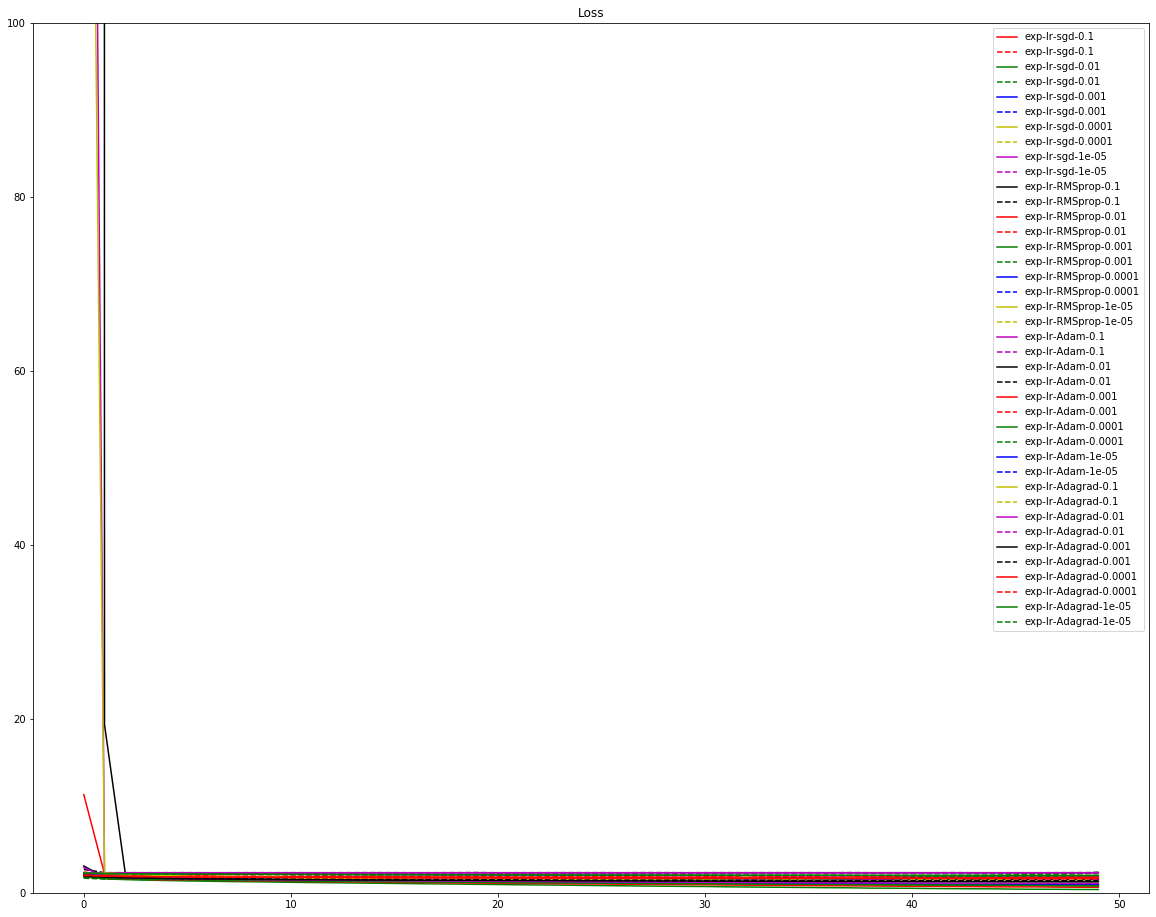

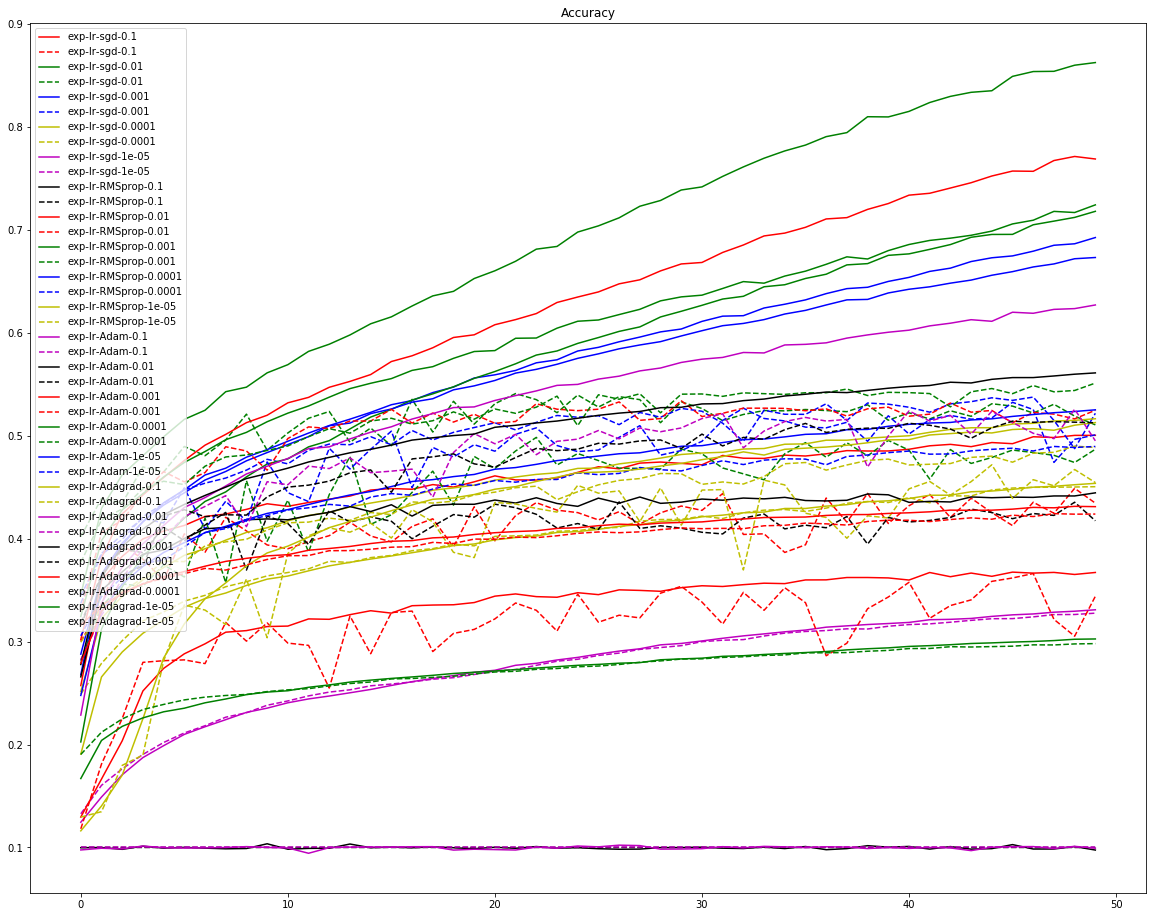

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(20,16))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(20,16))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()